# How did COVID-19 affect public transportation for essential workers in New York City? 

I will compare the total metro card swipes from the week of the shutdown (March 22, 2020) to the same week during the previous year to see the changes in ridership.

In [1]:
#Import and install important packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
#Import csv files week of March 21 - 27, 2020
march_fare_url = 'http://web.mta.info/developers/data/nyct/fares/fares_200404.csv'
march2020 = pd.read_csv(march_fare_url, header = 2)
march2020.head()

,REMOTE,STATION,FF,SEN/DIS,7-D AFAS UNL,30-D AFAS/RMF UNL,JOINT RR TKT,7-D UNL,30-D UNL,7D-XBUS PASS,...,AIRTRAIN 10-T,AIRTRAIN MTHLY,STUDENTS,NICE 2-T,CUNY-120,CUNY-60,FF VALUE,FF 7-DAY,FF 30-DAY,
0,R001,WHITEHALL STREET,6499,490,130,359,2,3414,3140,42,...,0,0,167,0,84,0,205,145,97,...
1,R003,CYPRESS HILLS,917,61,0,18,0,611,383,0,...,0,0,50,0,6,0,44,35,13,...
2,R004,75TH STREET & ELDERTS LANE,2110,77,4,37,0,1295,803,0,...,0,0,106,0,33,0,68,66,39,...
3,R005,85TH STREET & FOREST PKWAY,2163,87,31,45,0,1316,911,3,...,0,0,118,0,24,0,59,33,40,...
4,R006,WOODHAVEN BOULEVARD,2281,118,33,36,3,1775,1074,0,...,0,0,145,0,47,0,58,52,28,...


In [3]:
#View unique stations
march2020.columns

Index(['REMOTE', ' STATION', 'FF', 'SEN/DIS', ' 7-D AFAS UNL',
       '30-D AFAS/RMF UNL', 'JOINT RR TKT', '7-D UNL', '30-D UNL',
       '7D-XBUS PASS', 'TCMC', 'RF 2 TRIP', 'RR UNL NO TRADE',
       'TCMC ANNUAL MC', 'MR EZPAY EXP', 'MR EZPAY UNL', 'PATH 2-T',
       'AIRTRAIN FF', 'AIRTRAIN 30-D', 'AIRTRAIN 10-T', 'AIRTRAIN MTHLY',
       'STUDENTS', 'NICE 2-T', 'CUNY-120', 'CUNY-60', 'FF VALUE', 'FF 7-DAY',
       'FF 30-DAY',
       '                                                                     '],
      dtype='object')

In [4]:
march2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485 entries, 0 to 484
Data columns (total 29 columns):
REMOTE                                                                   485 non-null object
 STATION                                                                 485 non-null object
FF                                                                       485 non-null int64
SEN/DIS                                                                  485 non-null int64
 7-D AFAS UNL                                                            485 non-null int64
30-D AFAS/RMF UNL                                                        485 non-null int64
JOINT RR TKT                                                             485 non-null int64
7-D UNL                                                                  485 non-null int64
30-D UNL                                                                 485 non-null int64
7D-XBUS PASS                                                     

In [5]:
#Simplify column names
march2020.rename(columns = {' STATION': 'Station',
                                    'FF': 'Full Fare', 
                                    'SEN/DIS': 'Senior Citizen / Disabled', 
                                    ' 7-D AFAS UNL': '7 Day AFAS Unlimited', 
                                    '30-D AFAS/RMF UNL': '30 Day AFAS/RMF Unlimited',
                                    'JOINT RR TKT':'Joint Railroad Ticket', 
                                    '7-D UNL': '7 Day Unlimited', 
                                    '30-D UNL': '30 Day Unlimited',
                                    '7D-XBUS PASS': '7 Day Express Bus Pass',
                                    'TCMC': 'Transit Check Metrocard',
                                    'RF 2 TRIP' : 'Reduced Fare 2 Trip',
                                    'RR UNL NO TRADE':'Rail Road Unlimited No Trade',
                                    'TCMC ANNUAL MC':'Transit Check Metrocard Annual Metrocard', 
                                    'MR EZPAY EXP':'Mail and Ride Easy Pay Express', 
                                    'MR EZPAY UNL':'Mail and Ride Easy Pay Unlimited', 
                                    'PATH 2-T': 'Path 2 Trip',
                                    'AIRTRAIN FF':'Airtrain Full Faire', 
                                    'AIRTRAIN 30-D': 'Airtrain 30 Day', 
                                    'AIRTRAIN 10-T': 'Airtrain 10 Trip',
                                    'AIRTRAIN MTHLY': 'Airtrain Monthly',
                                    'STUDENTS': 'Student Pass', 
                                    'NICE 2-T': 'Nassau Inter-County Express 2 Trip',
                                    'CUNY-120': 'City University of New York 120', 
                                    'CUNY-60':'City University of New York 60', 
                                    'FF VALUE':'Full Fare Value',
                                    'FF 7-DAY': 'Full Fare 7 Day',
                                    'FF 30-DAY': 'Full Fare 30 Day' }, inplace = True)

In [6]:
#Test the replacement
march2020.head()

,REMOTE,Station,Full Fare,Senior Citizen / Disabled,7 Day AFAS Unlimited,30 Day AFAS/RMF Unlimited,Joint Railroad Ticket,7 Day Unlimited,30 Day Unlimited,7 Day Express Bus Pass,...,Airtrain 10 Trip,Airtrain Monthly,Student Pass,Nassau Inter-County Express 2 Trip,City University of New York 120,City University of New York 60,Full Fare Value,Full Fare 7 Day,Full Fare 30 Day,
0,R001,WHITEHALL STREET,6499,490,130,359,2,3414,3140,42,...,0,0,167,0,84,0,205,145,97,...
1,R003,CYPRESS HILLS,917,61,0,18,0,611,383,0,...,0,0,50,0,6,0,44,35,13,...
2,R004,75TH STREET & ELDERTS LANE,2110,77,4,37,0,1295,803,0,...,0,0,106,0,33,0,68,66,39,...
3,R005,85TH STREET & FOREST PKWAY,2163,87,31,45,0,1316,911,3,...,0,0,118,0,24,0,59,33,40,...
4,R006,WOODHAVEN BOULEVARD,2281,118,33,36,3,1775,1074,0,...,0,0,145,0,47,0,58,52,28,...


In [93]:
# Look at the station names for MTA
march2020['Station'].unique()

array(['WHITEHALL STREET              ', 'CYPRESS HILLS                 ',
       '75TH STREET & ELDERTS LANE    ', '85TH STREET & FOREST PKWAY    ',
       'WOODHAVEN BOULEVARD           ', '104TH STREET                  ',
       '111TH STREET                  ', '121ST STREET                  ',
       '42ND STREET & 8TH AVENUE      ', '34TH STREET & 8TH AVENUE      ',
       'FULTON STREET                 ', 'FIFTH AVENUE                  ',
       'LEXINGTON AVENUE              ', 'ROOSEVELT AVE/JACKSON HTS     ',
       '179TH STREET & HILLSIDE AVE   ', '47-50 STREETS/ROCKEFELLER     ',
       '42ND STREET & 6TH AVENUE      ', '34TH STREET & 6TH AVENUE      ',
       'SUTPHIN BOULEVARD             ', 'JAMAICA CENTER-PARSONS BLVD   ',
       'WALL STREET                   ', 'FULTON & WILLIAM STREETS      ',
       'PARK PLACE                    ', 'CHAMBERS STREET               ',
       '34TH STREET & 7TH AVENUE      ', '42ND STREET/TIMES SQUARE      ',
       '125TH STREET & BR

In [94]:
# Calculate total swipes by adding all the columns
march2020['Total Sum of Swipes'] = march2020.apply(lambda row : row['Full Fare':'Full Fare 30 Day'].sum(),axis = 1)
march2020.head()

,REMOTE,Station,Full Fare,Senior Citizen / Disabled,7 Day AFAS Unlimited,30 Day AFAS/RMF Unlimited,Joint Railroad Ticket,7 Day Unlimited,30 Day Unlimited,7 Day Express Bus Pass,...,Airtrain Monthly,Student Pass,Nassau Inter-County Express 2 Trip,City University of New York 120,City University of New York 60,Full Fare Value,Full Fare 7 Day,Full Fare 30 Day,,Total Sum of Swipes
0,R001,WHITEHALL STREET,6499,490,130,359,2,3414,3140,42,...,0,167,0,84,0,205,145,97,...,15485
1,R003,CYPRESS HILLS,917,61,0,18,0,611,383,0,...,0,50,0,6,0,44,35,13,...,2197
2,R004,75TH STREET & ELDERTS LANE,2110,77,4,37,0,1295,803,0,...,0,106,0,33,0,68,66,39,...,4876
3,R005,85TH STREET & FOREST PKWAY,2163,87,31,45,0,1316,911,3,...,0,118,0,24,0,59,33,40,...,4986
4,R006,WOODHAVEN BOULEVARD,2281,118,33,36,3,1775,1074,0,...,0,145,0,47,0,58,52,28,...,5832


In [95]:
#Calculate the total number of swipes across all stations
march2020['Total Sum of Swipes'].sum()

4287692

In [9]:
# Calculate stations with highest total swipes
march2020_largest = march2020.nlargest(5, ['Total Sum of Swipes'])
march2020_largest

,REMOTE,Station,Full Fare,Senior Citizen / Disabled,7 Day AFAS Unlimited,30 Day AFAS/RMF Unlimited,Joint Railroad Ticket,7 Day Unlimited,30 Day Unlimited,7 Day Express Bus Pass,...,Airtrain Monthly,Student Pass,Nassau Inter-County Express 2 Trip,City University of New York 120,City University of New York 60,Full Fare Value,Full Fare 7 Day,Full Fare 30 Day,,Total Sum of Swipes
160,R170,14TH STREET-UNION SQUARE,18891,1538,436,878,19,13165,13946,64,...,0,586,0,295,0,601,654,509,...,54578
16,R018,ROOSEVELT AVE/JACKSON HTS,18329,1334,383,848,0,11970,16198,3,...,0,509,0,207,0,320,202,392,...,53351
23,R025,JAMAICA CENTER-PARSONS BLVD,19182,1374,339,554,1,13333,8003,21,...,0,794,0,325,0,531,371,287,...,47599
52,R055,MAIN STREET,16767,1622,251,879,17,9891,11219,18,...,0,439,0,165,0,288,166,292,...,43762
9,R011,42ND STREET & 8TH AVENUE,25198,1015,222,393,5,5702,6888,43,...,0,367,0,127,0,318,158,163,...,42982


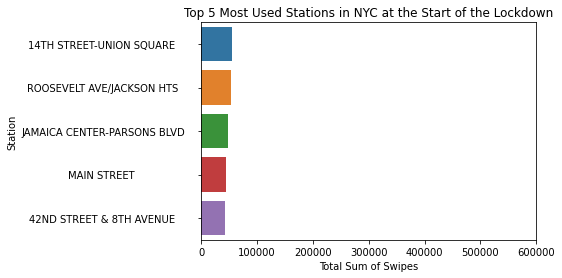

In [10]:
# Plot the top 5 stations with largest total number of swipes
sns.barplot(data = march2020_largest, y = 'Station', x = 'Total Sum of Swipes')
plt.xlim(0, 600000)
plt.title('Top 5 Most Used Stations in NYC at the Start of the Lockdown')
plt.show()

The top 5 busiest stations before lockdown were 14th Street-Union Square, 42nd Street & Grand Central, 59th Street/Columbus Circle, 34th Street & 6th Avenue, and 42nd Street & 8th Avenue. On the day of the official lockdown, the number of swipes decreased dramatically.

In [11]:
# Add top 5 stations to a list
top5 = ['R170', 'R046', 'R084', 'R022', 'R011']

In [12]:
#Separate out rows with the top 5 2019 stations to see the numbers in 2020
top5_pc = march2020.loc[(march2020['REMOTE'].isin(top5))]

In [13]:
# Test it out
top5_pc

,REMOTE,Station,Full Fare,Senior Citizen / Disabled,7 Day AFAS Unlimited,30 Day AFAS/RMF Unlimited,Joint Railroad Ticket,7 Day Unlimited,30 Day Unlimited,7 Day Express Bus Pass,...,Airtrain Monthly,Student Pass,Nassau Inter-County Express 2 Trip,City University of New York 120,City University of New York 60,Full Fare Value,Full Fare 7 Day,Full Fare 30 Day,,Total Sum of Swipes
9,R011,42ND STREET & 8TH AVENUE,25198,1015,222,393,5,5702,6888,43,...,0,367,0,127,0,318,158,163,...,42982
20,R022,34TH STREET & 6TH AVENUE,10237,689,193,382,31,5541,6765,52,...,0,265,0,164,0,292,258,266,...,26743
43,R046,42ND STREET & GRAND CENTRAL,12004,609,159,279,71,4423,5591,28,...,0,130,0,79,0,201,134,87,...,25323
74,R084,59TH STREET/COLUMBUS CIRCLE,15055,1264,238,599,13,8751,10149,27,...,0,424,0,232,0,487,370,354,...,40115
160,R170,14TH STREET-UNION SQUARE,18891,1538,436,878,19,13165,13946,64,...,0,586,0,295,0,601,654,509,...,54578


In [14]:
# Re-index to match the top 5 order from 2019
newtop = top5_pc.reindex([160, 43, 74, 20, 9])

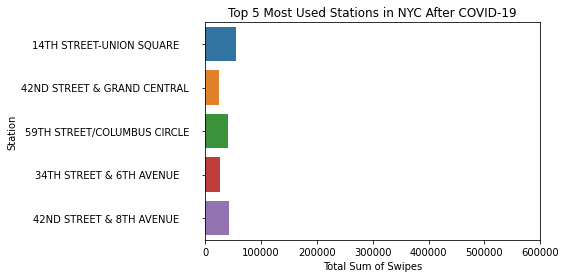

In [15]:
# Plot the top 5 stations for swipes from 2019 in 2020
sns.barplot(data = newtop, y = 'Station', x = 'Total Sum of Swipes')
plt.xlim(0, 600000)
plt.title('Top 5 Most Used Stations in NYC After COVID-19')
plt.show()

In [16]:
#Save top stations as csv for Google Data Stu
#newtop.to_csv(r'C:\Users\Andreya\Desktop\DS4ACases\mta\post.csv')

In [17]:
# Take a look at the top 5 essential neighborhood stops
canarsie_after = march2020.loc[(march2020['Station'].str.contains('ROCKAWAY PKWY'))]
jamaica_after = march2020.loc[(march2020['Station'].str.contains('JAMAICA CENTER-PARSONS BLVD'))]
st179_after = march2020.loc[(march2020['Station'].str.contains('TREMONT AVE-179TH ST'))]
st168_after = march2020.loc[(march2020['Station'].str.contains('168TH STREET & BROADWAY'))]
castle_hill_after = march2020.loc[(march2020['Station'].str.contains('CASTLE HILL AVENUE'))]

In [18]:
#Add all the subsets to create a new df
mtaframes_after = [canarsie_after, jamaica_after, st179_after, st168_after, castle_hill_after]
pc_origins_after = pd.concat(mtaframes_after)

In [19]:
#Check it out
pc_origins_after

,REMOTE,Station,Full Fare,Senior Citizen / Disabled,7 Day AFAS Unlimited,30 Day AFAS/RMF Unlimited,Joint Railroad Ticket,7 Day Unlimited,30 Day Unlimited,7 Day Express Bus Pass,...,Airtrain Monthly,Student Pass,Nassau Inter-County Express 2 Trip,City University of New York 120,City University of New York 60,Full Fare Value,Full Fare 7 Day,Full Fare 30 Day,,Total Sum of Swipes
142,R152,ROCKAWAY PKWY-GLENWOOD RD,4477,346,78,144,0,3584,2719,10,...,0,241,0,78,0,132,84,90,...,12647
23,R025,JAMAICA CENTER-PARSONS BLVD,19182,1374,339,554,1,13333,8003,21,...,0,794,0,325,0,531,371,287,...,47599
144,R154,TREMONT AVE-179TH ST,5033,320,84,178,0,4738,2490,7,...,0,422,0,142,0,356,254,232,...,14845
32,R035,168TH STREET & BROADWAY,10520,700,137,276,5,5637,7073,35,...,0,371,0,90,0,329,217,216,...,27552
96,R106,CASTLE HILL AVENUE,3848,208,44,77,0,2467,1759,4,...,0,188,0,78,0,190,132,112,...,9526


In [20]:
# Look at swipes per station
pc_origins_after[['Station', 'Total Sum of Swipes']]

,Station,Total Sum of Swipes
142,ROCKAWAY PKWY-GLENWOOD RD,12647
23,JAMAICA CENTER-PARSONS BLVD,47599
144,TREMONT AVE-179TH ST,14845
32,168TH STREET & BROADWAY,27552
96,CASTLE HILL AVENUE,9526


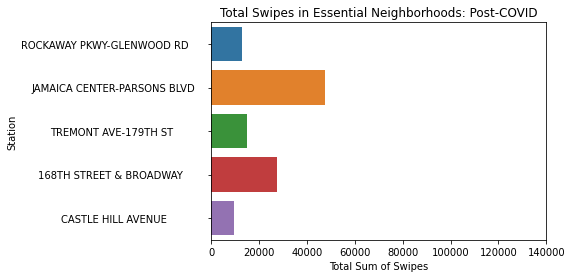

In [21]:
# Plot the swipes per station in the top essential worker neighborhoods
# sns.set(rc = {'figure.figsize':(x, y)}) resests the size of the plot if necessary
pc_origin_plot_after = sns.barplot(data = pc_origins_after, y = 'Station', x = 'Total Sum of Swipes')
plt.xlim(0, 140000)
plt.title('Total Swipes in Essential Neighborhoods: Post-COVID')
plt.show()

In [22]:
#Save csv for GDS
#pc_origins_after.to_csv(r'C:\Users\Andreya\Desktop\DS4ACases\mta.csv')

In [23]:
#Make a copy to add year column
postcovid_top = newtop.copy()

In [24]:
#Add a year column to march 2020
postcovid_top['Year'] = ('2020')

In [25]:
#Test it
postcovid_top

,REMOTE,Station,Full Fare,Senior Citizen / Disabled,7 Day AFAS Unlimited,30 Day AFAS/RMF Unlimited,Joint Railroad Ticket,7 Day Unlimited,30 Day Unlimited,7 Day Express Bus Pass,...,Student Pass,Nassau Inter-County Express 2 Trip,City University of New York 120,City University of New York 60,Full Fare Value,Full Fare 7 Day,Full Fare 30 Day,,Total Sum of Swipes,Year
160,R170,14TH STREET-UNION SQUARE,18891,1538,436,878,19,13165,13946,64,...,586,0,295,0,601,654,509,...,54578,2020
43,R046,42ND STREET & GRAND CENTRAL,12004,609,159,279,71,4423,5591,28,...,130,0,79,0,201,134,87,...,25323,2020
74,R084,59TH STREET/COLUMBUS CIRCLE,15055,1264,238,599,13,8751,10149,27,...,424,0,232,0,487,370,354,...,40115,2020
20,R022,34TH STREET & 6TH AVENUE,10237,689,193,382,31,5541,6765,52,...,265,0,164,0,292,258,266,...,26743,2020
9,R011,42ND STREET & 8TH AVENUE,25198,1015,222,393,5,5702,6888,43,...,367,0,127,0,318,158,163,...,42982,2020


In [26]:
#Subset the data to the columns I need for graphing
post_covid5 = postcovid_top[['Station', 'Total Sum of Swipes', 'Year']]

#### 2019 MTA Data

In [27]:
#Import csv files week of March 16 - 22, 2019
march19_fare_url = 'http://web.mta.info/developers/data/nyct/fares/fares_190330.csv'
march2019 = pd.read_csv(march19_fare_url, header = 2)
march2019.head()

,REMOTE,STATION,FF,SEN/DIS,7-D AFAS UNL,30-D AFAS/RMF UNL,JOINT RR TKT,7-D UNL,30-D UNL,14-D RFM UNL,...,PATH 2-T,AIRTRAIN FF,AIRTRAIN 30-D,AIRTRAIN 10-T,AIRTRAIN MTHLY,STUDENTS,NICE 2-T,CUNY-120,CUNY-60,
0,R001,WHITEHALL STREET,66303,2890,469,1067,243,30768,37958,0,...,0,1700,0,0,0,3617,0,816,0,...
1,R003,CYPRESS HILLS,2531,178,9,35,0,2140,1190,0,...,0,25,0,0,0,939,0,67,0,...
2,R004,75TH STREET & ELDERTS LANE,5953,375,45,109,0,4265,3117,0,...,0,44,0,0,0,3131,0,105,0,...
3,R005,85TH STREET & FOREST PKWAY,6784,540,51,161,0,4212,3677,0,...,0,73,0,0,0,1715,0,176,0,...
4,R006,WOODHAVEN BOULEVARD,6832,501,71,179,1,5896,4424,0,...,0,63,0,0,0,2065,0,165,0,...


In [28]:
#View columns, notably missing the 7 day pass column
march2019.columns

Index(['REMOTE', ' STATION', 'FF', 'SEN/DIS', ' 7-D AFAS UNL',
       '30-D AFAS/RMF UNL', 'JOINT RR TKT', '7-D UNL', '30-D UNL',
       '14-D RFM UNL', '1-D UNL', '14-D UNL', '7D-XBUS PASS', 'TCMC',
       'RF 2 TRIP', 'RR UNL NO TRADE', 'TCMC ANNUAL MC', 'MR EZPAY EXP',
       'MR EZPAY UNL', 'PATH 2-T', 'AIRTRAIN FF', 'AIRTRAIN 30-D',
       'AIRTRAIN 10-T', 'AIRTRAIN MTHLY', 'STUDENTS', 'NICE 2-T', 'CUNY-120',
       'CUNY-60',
       '                                                                   '],
      dtype='object')

In [29]:
# Rename columns in the dataframe
march2019.rename(columns = {' STATION': 'Station',
                                    'FF': 'Full Fare', 
                                    'SEN/DIS': 'Senior Citizen / Disabled', 
                                    ' 7-D AFAS UNL': '7 Day AFAS Unlimited', 
                                    '30-D AFAS/RMF UNL': '30 Day AFAS/RMF Unlimited',
                                    'JOINT RR TKT':'Joint Railroad Ticket', 
                                    '7-D UNL': '7 Day Unlimited', 
                                    '30-D UNL': '30 Day Unlimited',
                                    '7D-XBUS PASS': '7 Day Express Bus Pass',
                                    'TCMC': 'Transit Check Metrocard',
                                    'RF 2 TRIP' : 'Reduced Fare 2 Trip',
                                    'RR UNL NO TRADE':'Rail Road Unlimited No Trade',
                                    'TCMC ANNUAL MC':'Transit Check Metrocard Annual Metrocard', 
                                    'MR EZPAY EXP':'Mail and Ride Easy Pay Express', 
                                    'MR EZPAY UNL':'Mail and Ride Easy Pay Unlimited', 
                                    'PATH 2-T': 'Path 2 Trip',
                                    'AIRTRAIN FF':'Airtrain Full Faire', 
                                    'AIRTRAIN 30-D': 'Airtrain 30 Day', 
                                    'AIRTRAIN 10-T': 'Airtrain 10 Trip',
                                    'AIRTRAIN MTHLY': 'Airtrain Monthly',
                                    'STUDENTS': 'Student Pass', 
                                    'NICE 2-T': 'Nassau Inter-County Express 2 Trip',
                                    'CUNY-120': 'City University of New York 120', 
                                    'CUNY-60':'City University of New York 60' }, inplace = True)

In [30]:
# Test it out
march2019.head()

,REMOTE,Station,Full Fare,Senior Citizen / Disabled,7 Day AFAS Unlimited,30 Day AFAS/RMF Unlimited,Joint Railroad Ticket,7 Day Unlimited,30 Day Unlimited,14-D RFM UNL,...,Path 2 Trip,Airtrain Full Faire,Airtrain 30 Day,Airtrain 10 Trip,Airtrain Monthly,Student Pass,Nassau Inter-County Express 2 Trip,City University of New York 120,City University of New York 60,
0,R001,WHITEHALL STREET,66303,2890,469,1067,243,30768,37958,0,...,0,1700,0,0,0,3617,0,816,0,...
1,R003,CYPRESS HILLS,2531,178,9,35,0,2140,1190,0,...,0,25,0,0,0,939,0,67,0,...
2,R004,75TH STREET & ELDERTS LANE,5953,375,45,109,0,4265,3117,0,...,0,44,0,0,0,3131,0,105,0,...
3,R005,85TH STREET & FOREST PKWAY,6784,540,51,161,0,4212,3677,0,...,0,73,0,0,0,1715,0,176,0,...
4,R006,WOODHAVEN BOULEVARD,6832,501,71,179,1,5896,4424,0,...,0,63,0,0,0,2065,0,165,0,...


In [85]:
# Calculate and add the 
march2019['Total Sum of Swipes'] = march2019.apply(lambda row : row['Full Fare':'City University of New York 120'].sum(),axis = 1)
march2019.head()

,REMOTE,Station,Full Fare,Senior Citizen / Disabled,7 Day AFAS Unlimited,30 Day AFAS/RMF Unlimited,Joint Railroad Ticket,7 Day Unlimited,30 Day Unlimited,14-D RFM UNL,...,Airtrain Full Faire,Airtrain 30 Day,Airtrain 10 Trip,Airtrain Monthly,Student Pass,Nassau Inter-County Express 2 Trip,City University of New York 120,City University of New York 60,,Total Sum of Swipes
0,R001,WHITEHALL STREET,66303,2890,469,1067,243,30768,37958,0,...,1700,0,0,0,3617,0,816,0,...,158139
1,R003,CYPRESS HILLS,2531,178,9,35,0,2140,1190,0,...,25,0,0,0,939,0,67,0,...,7334
2,R004,75TH STREET & ELDERTS LANE,5953,375,45,109,0,4265,3117,0,...,44,0,0,0,3131,0,105,0,...,17769
3,R005,85TH STREET & FOREST PKWAY,6784,540,51,161,0,4212,3677,0,...,73,0,0,0,1715,0,176,0,...,18018
4,R006,WOODHAVEN BOULEVARD,6832,501,71,179,1,5896,4424,0,...,63,0,0,0,2065,0,165,0,...,20944


In [86]:
march2020.head()

,REMOTE,STATION,FF,SEN/DIS,7-D AFAS UNL,30-D AFAS/RMF UNL,JOINT RR TKT,7-D UNL,30-D UNL,7D-XBUS PASS,...,AIRTRAIN 10-T,AIRTRAIN MTHLY,STUDENTS,NICE 2-T,CUNY-120,CUNY-60,FF VALUE,FF 7-DAY,FF 30-DAY,
0,R001,WHITEHALL STREET,6499,490,130,359,2,3414,3140,42,...,0,0,167,0,84,0,205,145,97,...
1,R003,CYPRESS HILLS,917,61,0,18,0,611,383,0,...,0,0,50,0,6,0,44,35,13,...
2,R004,75TH STREET & ELDERTS LANE,2110,77,4,37,0,1295,803,0,...,0,0,106,0,33,0,68,66,39,...
3,R005,85TH STREET & FOREST PKWAY,2163,87,31,45,0,1316,911,3,...,0,0,118,0,24,0,59,33,40,...
4,R006,WOODHAVEN BOULEVARD,2281,118,33,36,3,1775,1074,0,...,0,0,145,0,47,0,58,52,28,...


In [96]:
#Calculate the total number of swipes across all stations
march2019['Total Sum of Swipes'].sum()

32171934

In [97]:
# Compare total number of swipes 2019 - total swipes 2020
march2019['Total Sum of Swipes'].sum() - march2020['Total Sum of Swipes'].sum()

27884242

There were 27,884,242 more swipes during the same week in 2019, than there were during the shutdown week in 2020.

In [98]:
# Calculate percent change in total swipes
round(((march2019['Total Sum of Swipes'].sum() - march2020['Total Sum of Swipes'].sum())/march2019['Total Sum of Swipes'].sum())*100, 2)

86.67

The percentage of total riders decreased by about 87% from 2019 to 2020 during the week of the shutdown.

In [99]:
march2019_copy = march2019.copy()

In [100]:
march2019_copy['Percent'] = round(((march2019_copy['Total Sum of Swipes'] - march2020['Total Sum of Swipes'])/march2019_copy['Total Sum of Swipes'])*100, 2)
march2019_copy.head()

,REMOTE,Station,Full Fare,Senior Citizen / Disabled,7 Day AFAS Unlimited,30 Day AFAS/RMF Unlimited,Joint Railroad Ticket,7 Day Unlimited,30 Day Unlimited,14-D RFM UNL,...,Airtrain 30 Day,Airtrain 10 Trip,Airtrain Monthly,Student Pass,Nassau Inter-County Express 2 Trip,City University of New York 120,City University of New York 60,,Total Sum of Swipes,Percent
0,R001,WHITEHALL STREET,66303,2890,469,1067,243,30768,37958,0,...,0,0,0,3617,0,816,0,...,158139,90.21
1,R003,CYPRESS HILLS,2531,178,9,35,0,2140,1190,0,...,0,0,0,939,0,67,0,...,7334,70.04
2,R004,75TH STREET & ELDERTS LANE,5953,375,45,109,0,4265,3117,0,...,0,0,0,3131,0,105,0,...,17769,72.56
3,R005,85TH STREET & FOREST PKWAY,6784,540,51,161,0,4212,3677,0,...,0,0,0,1715,0,176,0,...,18018,72.33
4,R006,WOODHAVEN BOULEVARD,6832,501,71,179,1,5896,4424,0,...,0,0,0,2065,0,165,0,...,20944,72.15


In [35]:
# Look at the largest number of swipes per station in 2019
march2019_largest = march2019.nlargest(5, ['Total Sum of Swipes'])
march2019_largest

,REMOTE,Station,Full Fare,Senior Citizen / Disabled,7 Day AFAS Unlimited,30 Day AFAS/RMF Unlimited,Joint Railroad Ticket,7 Day Unlimited,30 Day Unlimited,14-D RFM UNL,...,Airtrain Full Faire,Airtrain 30 Day,Airtrain 10 Trip,Airtrain Monthly,Student Pass,Nassau Inter-County Express 2 Trip,City University of New York 120,City University of New York 60,,Total Sum of Swipes
159,R170,14TH STREET-UNION SQUARE,217991,16122,1645,3970,489,105390,178072,2,...,3850,0,0,0,20157,0,1348,0,...,592822
42,R046,42ND STREET & GRAND CENTRAL,228223,10976,642,1337,2553,56733,94461,0,...,3784,0,0,0,2186,0,563,0,...,437114
73,R084,59TH STREET/COLUMBUS CIRCLE,172949,13507,1003,2879,442,81778,114878,0,...,3656,0,0,0,13821,0,2647,0,...,436879
19,R022,34TH STREET & 6TH AVENUE,180358,10449,935,2420,759,83910,118097,0,...,3684,0,0,0,4017,0,1109,0,...,435493
8,R011,42ND STREET & 8TH AVENUE,249345,11603,716,1814,99,49010,70523,0,...,3674,0,0,0,3024,0,521,0,...,416167


In [36]:
#Save to csv for Google Data Studio
#march2019_largest.to_csv(r'C:\Users\Andreya\Desktop\DS4ACases\mta\pre.csv')

The top 5 busiest stations before lockdown were 14th Street-Union Square, 42nd Street & Grand Central, 59th Street/Columbus Circle, 34th Street & 6th Avenue, and 42nd Street & 8th Avenue.

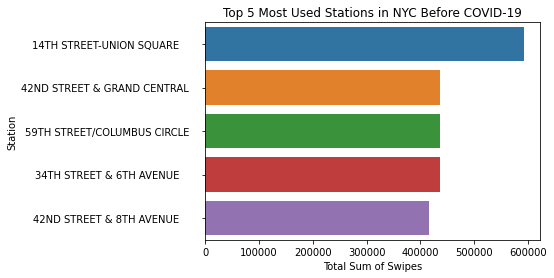

In [37]:
# Plot the top 5 stations with largest total number of swipes
sns.barplot(data = march2019_largest, y = 'Station', x = 'Total Sum of Swipes')
plt.title('Top 5 Most Used Stations in NYC Before COVID-19')
plt.show()

In [38]:
precovid_top = march2019_largest.copy()

In [39]:
# Add a year column to the 2019 data
precovid_top['Year'] = ('2019')

In [40]:
# Test for new column
precovid_top

,REMOTE,Station,Full Fare,Senior Citizen / Disabled,7 Day AFAS Unlimited,30 Day AFAS/RMF Unlimited,Joint Railroad Ticket,7 Day Unlimited,30 Day Unlimited,14-D RFM UNL,...,Airtrain 30 Day,Airtrain 10 Trip,Airtrain Monthly,Student Pass,Nassau Inter-County Express 2 Trip,City University of New York 120,City University of New York 60,,Total Sum of Swipes,Year
159,R170,14TH STREET-UNION SQUARE,217991,16122,1645,3970,489,105390,178072,2,...,0,0,0,20157,0,1348,0,...,592822,2019
42,R046,42ND STREET & GRAND CENTRAL,228223,10976,642,1337,2553,56733,94461,0,...,0,0,0,2186,0,563,0,...,437114,2019
73,R084,59TH STREET/COLUMBUS CIRCLE,172949,13507,1003,2879,442,81778,114878,0,...,0,0,0,13821,0,2647,0,...,436879,2019
19,R022,34TH STREET & 6TH AVENUE,180358,10449,935,2420,759,83910,118097,0,...,0,0,0,4017,0,1109,0,...,435493,2019
8,R011,42ND STREET & 8TH AVENUE,249345,11603,716,1814,99,49010,70523,0,...,0,0,0,3024,0,521,0,...,416167,2019


In [41]:
#Subset the data for GDS graphs
pre_covid5 = precovid_top[['Station', 'Total Sum of Swipes', 'Year']]

In [42]:
pre_covid5

,Station,Total Sum of Swipes,Year
159,14TH STREET-UNION SQUARE,592822,2019
42,42ND STREET & GRAND CENTRAL,437114,2019
73,59TH STREET/COLUMBUS CIRCLE,436879,2019
19,34TH STREET & 6TH AVENUE,435493,2019
8,42ND STREET & 8TH AVENUE,416167,2019


In [43]:
# Merge 2019 and 2020 for GDS viz
top5_both = pre_covid5.append(post_covid5)

In [44]:
#Reset the index to get rid of original numbers from the raw data
top5_both.reset_index(drop = True, inplace = True)

In [45]:
top5_both

,Station,Total Sum of Swipes,Year
0,14TH STREET-UNION SQUARE,592822,2019
1,42ND STREET & GRAND CENTRAL,437114,2019
2,59TH STREET/COLUMBUS CIRCLE,436879,2019
3,34TH STREET & 6TH AVENUE,435493,2019
4,42ND STREET & 8TH AVENUE,416167,2019
5,14TH STREET-UNION SQUARE,54578,2020
6,42ND STREET & GRAND CENTRAL,25323,2020
7,59TH STREET/COLUMBUS CIRCLE,40115,2020
8,34TH STREET & 6TH AVENUE,26743,2020
9,42ND STREET & 8TH AVENUE,42982,2020


In [46]:
#Save the df as a csv
#top5_both.to_csv(r'C:\Users\Andreya\Desktop\DS4ACases\mta\top5both.csv', index = False)

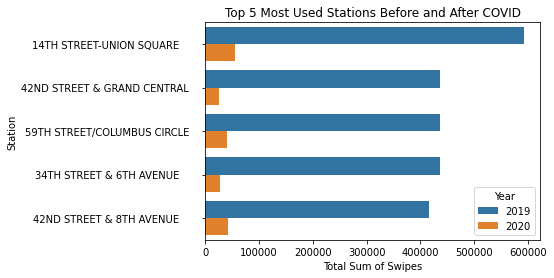

In [47]:
#Graph it using double bar graph to compare
sns.barplot(y='Station', x='Total Sum of Swipes', hue='Year', data=top5_both)
plt.title('Top 5 Most Used Stations Before and After COVID')
plt.show()

In [48]:
# Take a look at the top 5 essential neighborhood stops before COVID, pay attention to case
canarsie_before = march2019.loc[(march2019['Station'].str.contains('ROCKAWAY PKWY'))]
jamaica_before = march2019.loc[(march2019['Station'].str.contains('JAMAICA CENTER-PARSONS BLVD'))]
st179_before = march2019.loc[(march2019['Station'].str.contains('TREMONT AVE-179TH ST'))]
st168_before = march2019.loc[(march2019['Station'].str.contains('168TH STREET & BROADWAY'))]
castle_hill_before = march2019.loc[(march2019['Station'].str.contains('CASTLE HILL AVENUE'))]

In [49]:
# Add up the dataframes
mtaframes_before = [canarsie_before, jamaica_before, st179_before, st168_before, castle_hill_before]
bc_origins = pd.concat(mtaframes_before)

In [50]:
#Check it out
bc_origins

,REMOTE,Station,Full Fare,Senior Citizen / Disabled,7 Day AFAS Unlimited,30 Day AFAS/RMF Unlimited,Joint Railroad Ticket,7 Day Unlimited,30 Day Unlimited,14-D RFM UNL,...,Airtrain Full Faire,Airtrain 30 Day,Airtrain 10 Trip,Airtrain Monthly,Student Pass,Nassau Inter-County Express 2 Trip,City University of New York 120,City University of New York 60,,Total Sum of Swipes
141,R152,ROCKAWAY PKWY-GLENWOOD RD,17428,1049,358,520,4,16514,11843,0,...,76,0,0,0,2824,0,399,0,...,54036
22,R025,JAMAICA CENTER-PARSONS BLVD,43627,2150,829,1605,15,49792,32460,0,...,400,0,0,0,6925,0,1786,0,...,146961
143,R154,TREMONT AVE-179TH ST,15727,933,280,371,8,19582,9636,0,...,102,0,0,0,4007,0,698,0,...,53381
31,R035,168TH STREET & BROADWAY,39531,3344,425,616,62,24121,33797,0,...,530,0,0,0,4868,0,361,0,...,114825
95,R106,CASTLE HILL AVENUE,12392,755,113,162,1,10003,7133,0,...,55,0,0,0,3125,0,433,0,...,35851


In [51]:
bc_origins[['Station', 'Total Sum of Swipes']]

,Station,Total Sum of Swipes
141,ROCKAWAY PKWY-GLENWOOD RD,54036
22,JAMAICA CENTER-PARSONS BLVD,146961
143,TREMONT AVE-179TH ST,53381
31,168TH STREET & BROADWAY,114825
95,CASTLE HILL AVENUE,35851


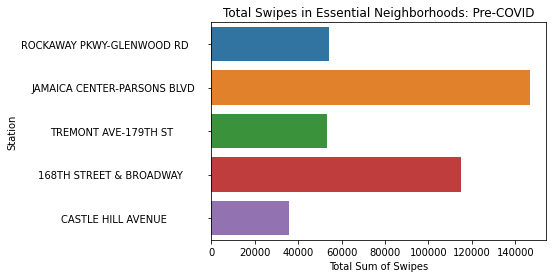

In [52]:
# Plot it 
sns.barplot(data = bc_origins, y = 'Station', x = 'Total Sum of Swipes')
plt.title('Total Swipes in Essential Neighborhoods: Pre-COVID')
plt.show()

In [53]:
pc_origins_after['Year'] = ('2020')

In [54]:
pc_origins_after

,REMOTE,Station,Full Fare,Senior Citizen / Disabled,7 Day AFAS Unlimited,30 Day AFAS/RMF Unlimited,Joint Railroad Ticket,7 Day Unlimited,30 Day Unlimited,7 Day Express Bus Pass,...,Student Pass,Nassau Inter-County Express 2 Trip,City University of New York 120,City University of New York 60,Full Fare Value,Full Fare 7 Day,Full Fare 30 Day,,Total Sum of Swipes,Year
142,R152,ROCKAWAY PKWY-GLENWOOD RD,4477,346,78,144,0,3584,2719,10,...,241,0,78,0,132,84,90,...,12647,2020
23,R025,JAMAICA CENTER-PARSONS BLVD,19182,1374,339,554,1,13333,8003,21,...,794,0,325,0,531,371,287,...,47599,2020
144,R154,TREMONT AVE-179TH ST,5033,320,84,178,0,4738,2490,7,...,422,0,142,0,356,254,232,...,14845,2020
32,R035,168TH STREET & BROADWAY,10520,700,137,276,5,5637,7073,35,...,371,0,90,0,329,217,216,...,27552,2020
96,R106,CASTLE HILL AVENUE,3848,208,44,77,0,2467,1759,4,...,188,0,78,0,190,132,112,...,9526,2020


In [55]:
bc_origins['Year'] = ('2019')

In [56]:
bc_origins

,REMOTE,Station,Full Fare,Senior Citizen / Disabled,7 Day AFAS Unlimited,30 Day AFAS/RMF Unlimited,Joint Railroad Ticket,7 Day Unlimited,30 Day Unlimited,14-D RFM UNL,...,Airtrain 30 Day,Airtrain 10 Trip,Airtrain Monthly,Student Pass,Nassau Inter-County Express 2 Trip,City University of New York 120,City University of New York 60,,Total Sum of Swipes,Year
141,R152,ROCKAWAY PKWY-GLENWOOD RD,17428,1049,358,520,4,16514,11843,0,...,0,0,0,2824,0,399,0,...,54036,2019
22,R025,JAMAICA CENTER-PARSONS BLVD,43627,2150,829,1605,15,49792,32460,0,...,0,0,0,6925,0,1786,0,...,146961,2019
143,R154,TREMONT AVE-179TH ST,15727,933,280,371,8,19582,9636,0,...,0,0,0,4007,0,698,0,...,53381,2019
31,R035,168TH STREET & BROADWAY,39531,3344,425,616,62,24121,33797,0,...,0,0,0,4868,0,361,0,...,114825,2019
95,R106,CASTLE HILL AVENUE,12392,755,113,162,1,10003,7133,0,...,0,0,0,3125,0,433,0,...,35851,2019


In [57]:
both = pd.concat([pc_origins_after, bc_origins], sort = False)

In [58]:
both

,REMOTE,Station,Full Fare,Senior Citizen / Disabled,7 Day AFAS Unlimited,30 Day AFAS/RMF Unlimited,Joint Railroad Ticket,7 Day Unlimited,30 Day Unlimited,7 Day Express Bus Pass,...,Full Fare Value,Full Fare 7 Day,Full Fare 30 Day,,Total Sum of Swipes,Year,14-D RFM UNL,1-D UNL,14-D UNL,
142,R152,ROCKAWAY PKWY-GLENWOOD RD,4477,346,78,144,0,3584,2719,10,...,132.0,84.0,90.0,...,12647,2020,NaN,NaN,NaN,NaN
23,R025,JAMAICA CENTER-PARSONS BLVD,19182,1374,339,554,1,13333,8003,21,...,531.0,371.0,287.0,...,47599,2020,NaN,NaN,NaN,NaN
144,R154,TREMONT AVE-179TH ST,5033,320,84,178,0,4738,2490,7,...,356.0,254.0,232.0,...,14845,2020,NaN,NaN,NaN,NaN
32,R035,168TH STREET & BROADWAY,10520,700,137,276,5,5637,7073,35,...,329.0,217.0,216.0,...,27552,2020,NaN,NaN,NaN,NaN
96,R106,CASTLE HILL AVENUE,3848,208,44,77,0,2467,1759,4,...,190.0,132.0,112.0,...,9526,2020,NaN,NaN,NaN,NaN
141,R152,ROCKAWAY PKWY-GLENWOOD RD,17428,1049,358,520,4,16514,11843,33,...,NaN,NaN,NaN,NaN,54036,2019,0.0,0.0,0.0,...
22,R025,JAMAICA CENTER-PARSONS BLVD,43627,2150,829,1605,15,49792,32460,68,...,NaN,NaN,NaN,NaN,146961,2019,0.0,0.0,0.0,...
143,R154,TREMONT AVE-179TH ST,15727,933,280,371,8,19582,9636,16,...,NaN,NaN,NaN,NaN,53381,2019,0.0,0.0,0.0,...
31,R035,168TH STREET & BROADWAY,39531,3344,425,616,62,24121,33797,88,...,NaN,NaN,NaN,NaN,114825,2019,0.0,0.0,0.0,...
95,R106,CASTLE HILL AVENUE,12392,755,113,162,1,10003,7133,26,...,NaN,NaN,NaN,NaN,35851,2019,0.0,0.0,0.0,...


In [59]:
#Save file to CSV for Google Data Studio
#both.to_csv(r'C:\Users\Andreya\Desktop\DS4ACases\mta\pre_and_post.csv', index = False)

In [60]:
both_grouped = both.groupby(['Year', 'Station'])

In [61]:
both_grouped.first()

REMOTE  Full Fare  \
Year Station                                            
2019 168TH STREET & BROADWAY          R035      39531   
     CASTLE HILL AVENUE               R106      12392   
     JAMAICA CENTER-PARSONS BLVD      R025      43627   
     ROCKAWAY PKWY-GLENWOOD RD        R152      17428   
     TREMONT AVE-179TH ST             R154      15727   
2020 168TH STREET & BROADWAY          R035      10520   
     CASTLE HILL AVENUE               R106       3848   
     JAMAICA CENTER-PARSONS BLVD      R025      19182   
     ROCKAWAY PKWY-GLENWOOD RD        R152       4477   
     TREMONT AVE-179TH ST             R154       5033   

                                     Senior Citizen / Disabled  \
Year Station                                                     
2019 168TH STREET & BROADWAY                              3344   
     CASTLE HILL AVENUE                                    755   
     JAMAICA CENTER-PARSONS BLVD                          2150   
     ROCKAWAY PKWY-GLENWOOD RD                            1049   
     TREMONT AVE-179TH ST                                  933   
2020 168TH STREET & BROADWAY                               700   
     CASTLE HILL AVENUE                                    208   
     JAMAICA CENTER-PARSONS BLVD                          1374   
     ROCKAWAY PKWY-GLENWOOD RD                             346   
     TREMONT AVE-179TH ST                                  320   

                                     7 Day AFAS Unlimited  \
Year Station                                                
2019 168TH STREET & BROADWAY                          425   
     CASTLE HILL AVENUE                               113   
     JAMAICA CENTER-PARSONS BLVD                      829   
     ROCKAWAY PKWY-GLENWOOD RD                        358   
     TREMONT AVE-179TH ST                             280   
2020 168TH STREET & BROADWAY                          137   
     CASTLE HILL AVENUE                                44   
     JAMAICA CENTER-PARSONS BLVD                      339   
     ROCKAWAY PKWY-GLENWOOD RD                         78   
     TREMONT AVE-179TH ST                              84   

                                     30 Day AFAS/RMF Unlimited  \
Year Station                                                     
2019 168TH STREET & BROADWAY                               616   
     CASTLE HILL AVENUE                                    162   
     JAMAICA CENTER-PARSONS BLVD                          1605   
     ROCKAWAY PKWY-GLENWOOD RD                             520   
     TREMONT AVE-179TH ST                                  371   
2020 168TH STREET & BROADWAY                               276   
     CASTLE HILL AVENUE                                     77   
     JAMAICA CENTER-PARSONS BLVD                           554   
     ROCKAWAY PKWY-GLENWOOD RD                             144   
     TREMONT AVE-179TH ST                                  178   

                                     Joint Railroad Ticket  7 Day Unlimited  \
Year Station                                                                  
2019 168TH STREET & BROADWAY                            62            24121   
     CASTLE HILL AVENUE                                  1            10003   
     JAMAICA CENTER-PARSONS BLVD                        15            49792   
     ROCKAWAY PKWY-GLENWOOD RD                           4            16514   
     TREMONT AVE-179TH ST                                8            19582   
2020 168TH STREET & BROADWAY                             5             5637   
     CASTLE HILL AVENUE                                  0             2467   
     JAMAICA CENTER-PARSONS BLVD                         1            13333   
     ROCKAWAY PKWY-GLENWOOD RD                           0             3584   
     TREMONT AVE-179TH ST                                0             4738   

                                     30 Day Unlimited  7 Day Express Bus Pass  \
Ye

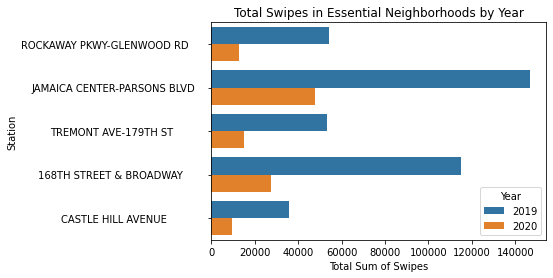

In [62]:
# Plot both
# sns.set(rc = {'figure.figsize':(14 , 8)})
# sns.set_style("ticks", {"xtick.major.size":1, "ytick.major.size": 1})
sns.barplot(data = both, y = 'Station', x = 'Total Sum of Swipes', hue = 'Year')
plt.title('Total Swipes in Essential Neighborhoods by Year')
plt.show()

In [63]:
#Calculate the percent decrease on lockdown week 2019 vs. 2020
round(((bc_origins['Total Sum of Swipes'].sum() - pc_origins_after['Total Sum of Swipes'].sum())/bc_origins['Total Sum of Swipes'].sum())*100, 2)

72.31

The total sum of swipes decreased about 72% in essential worker neighborhoods on the week of March 22. This appears to be significantly less than the decrease of 87% seen at the top 5 overall subway stations, suggesting that essential workers really do live near and rely on these stations for travel.

In [105]:
#Look at all the percentages in our essential neighbothoods
ca = march2019_copy.loc[(march2019_copy['Station'].str.contains('ROCKAWAY PKWY'))]
ja = march2019_copy.loc[(march2019_copy['Station'].str.contains('JAMAICA CENTER-PARSONS BLVD'))]
st17 = march2019_copy.loc[(march2019_copy['Station'].str.contains('TREMONT AVE-179TH ST'))]
st16 = march2019_copy.loc[(march2019_copy['Station'].str.contains('168TH STREET & BROADWAY'))]
cas = march2019_copy.loc[(march2019_copy['Station'].str.contains('CASTLE HILL AVENUE'))]

In [112]:
#Add up the dfs with the percentages
all = [ca, ja, st17,st16, cas]
percentages = pd.concat(all)
percentages

,REMOTE,Station,Full Fare,Senior Citizen / Disabled,7 Day AFAS Unlimited,30 Day AFAS/RMF Unlimited,Joint Railroad Ticket,7 Day Unlimited,30 Day Unlimited,14-D RFM UNL,...,Airtrain 30 Day,Airtrain 10 Trip,Airtrain Monthly,Student Pass,Nassau Inter-County Express 2 Trip,City University of New York 120,City University of New York 60,,Total Sum of Swipes,Percent
141,R152,ROCKAWAY PKWY-GLENWOOD RD,17428,1049,358,520,4,16514,11843,0,...,0,0,0,2824,0,399,0,...,54036,66.34
22,R025,JAMAICA CENTER-PARSONS BLVD,43627,2150,829,1605,15,49792,32460,0,...,0,0,0,6925,0,1786,0,...,146961,79.86
143,R154,TREMONT AVE-179TH ST,15727,933,280,371,8,19582,9636,0,...,0,0,0,4007,0,698,0,...,53381,65.34
31,R035,168TH STREET & BROADWAY,39531,3344,425,616,62,24121,33797,0,...,0,0,0,4868,0,361,0,...,114825,94.38
95,R106,CASTLE HILL AVENUE,12392,755,113,162,1,10003,7133,0,...,0,0,0,3125,0,433,0,...,35851,66.18


In [113]:
stats.ttest_1samp(percentages['Percent'], popmean = march2019_copy['Percent'].mean())

Ttest_1sampResult(statistic=14.368652685042171, pvalue=0.00013633017041594003)

The t test shows that there is a statistical significance in the decrease of swipes from 2019 to 2020.